<a href="http://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project02%20-%20Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [1]:
!pip install textsearch
!pip install contractions
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load and View Dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2010%20-%20Project%208%20-%20Movie%20Recommendations%20with%20Document%20Similarity/tmdb_5000_movies.csv.gz', compression='gzip')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df = df[['title', 'tagline', 'overview', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.head()

,title,tagline,overview,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",43.926995,"Lost in our world, found in another. John Cart..."


## Your Turn: Cluster Similar Movies

Here you will learn how to cluster text documents (in this case movies). We will use the following pipeline:
- Text pre-processing
- Feature Engineering
- Clustering Using K-Means
- Finding Optimal Value for K
- Prepare Movie Clusters

Clustering is an unsupervised approach to find groups of similar items in any given dataset. There are different clustering algorithms and __K-Means__ is a pretty simple yet affect one. Most movies span different emotions and can be categorized into multiple genres (same is the case with movies listed in our current dataset). Can clustering of movie descriptions help us understand these groupings?

Similarity analysis (in the previous section) was a good starting point, can we cluster multiple movies together now.

## Text pre-processing

basic text pre-processing on our movie descriptions before we build our features

In [4]:
import nltk
import re
import numpy as np
import contractions

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

## Extract TF-IDF Features

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = stop_words + ['one', 'two', 'three', 'four', 'five', 'get']
tv = TfidfVectorizer(ngram_range=(1, 3), min_df=0.001, max_df=0.99, stop_words=stop_words)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix.shape

(4800, 6125)

## Cluster Movies using K-Means

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between 

(1) assigning data points to clusters based on the current centroids 
(2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

till convergence..

![](https://i.imgur.com/42n9uvR.png)

Features we are using here are BOW based features

In [6]:
from sklearn.cluster import KMeans

SSE = []
K = range(1,15)
for k in K:

    #[TODO] use KMeans function to do k-means clustering
    #km=KMeans(...).fit(...)
    km = KMeans(n_clusters=k, max_iter=10000, random_state=42).fit(tv_matrix)
    SSE.append(km.inertia_)

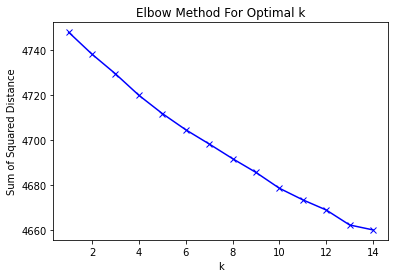

In [7]:
import matplotlib.pyplot as plt
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
#[TODO]: find NUM_CLUSTER by your observation
NUM_CLUSTER=13
km = KMeans(n_clusters=NUM_CLUSTER, max_iter=10000, random_state=42).fit(tv_matrix)

TODO: briefly explain what you observed and the reason of choosing specific k.

選擇13是因為在13-14的斜率，跟1-13間的斜率比起來明顯變得平緩，以elbow method來看，要選從該k開始曲線變平緩的位置，所以選13作為optimal k。

我覺得這個data，可能不太適合用elbow method找optimal k，因為從圖中沒有看到特別適合的k值，有嘗試把k的range變大，但是沒有看到明顯的最佳k的位置，所以還是把range調回1-15，但是如果要用elbow method選k，會選擇13當作optimal k。

In [9]:
df['kmeans_cluster'] = km.labels_
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

In [10]:
feature_names = tv.get_feature_names()
topn_features = 30
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTER):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['family', 'home', 'house', 'bond', 'james', 'james bond', 'back', 'father', 'mother', 'lives', 'son', 'new', 'finds', 'returns', 'young', 'come', 'child', 'revenge', 'go', 'things', 'daughter', 'us', 'together', 'living', 'brother', 'find', 'vacation', 'wife', 'day', 'every']
Popular Movies: ['The Godfather', 'Quantum of Solace', 'Furious 7', "We're the Millers", 'The Twilight Saga: Breaking Dawn - Part 2', 'Gladiator', "Pan's Labyrinth", 'Birdman', 'Prisoners', 'American Sniper', 'The Hunger Games: Catching Fire', 'Run All Night', 'Southpaw', 'The Croods', 'Warcraft', 'Hotel Transylvania 2', 'GoldenEye', 'Insidious', 'The Purge', 'Warrior']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['love', 'falls', 'falls love', 'life', 'story', 'fall', 'fall love', 'love story', 'find', 'true love', 'woman', 'man', 'never', 'true', 'finds', 'father', 'meets', 'romance', 'young', 'wife', 'family', 'back', 'make'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

## Hierarchical Clustering
So far, we were successfull in clustering movies using __K-Means__. Now we can move further onto **Hierarchical Clustering**. 

K-Means helped us understand similarities amongst movies, with hierarchical clustering we can aim at understanding abstract or higher level concepts which are common across groups of movies. 

For this tutorial, we will work with several linkage methods. To work with these clustering algorithm, we perform the following steps:
-  Prepare a cosine distance or euclidean distance matrix
-  Calclate a linkage_matrix
-  Plot the hierarchical structure as a dendrogram. 



In [12]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

### Calculate Linkage Matrix

In [13]:
def single_euclidean_hierarchical_clustering(feature_matrix):
    #[TODO] implement single linkage matrix with euclidean distance
    #compute euclidean distance
    dist = euclidean_distances(feature_matrix, feature_matrix)
    #compute single linkage matrix with euclidean distance
    linkage_matrix = single(dist)
    
    return linkage_matrix

In [14]:
def complete_cosine_hierarchical_clustering(feature_matrix):

    #[TODO] implement complete linkage matrix with cosine distance
    #compute cosine distance
    dist = cosine_similarity(feature_matrix, feature_matrix)
    #compute complete linkage with cosine distance
    linkage_matrix = complete(dist)

    return linkage_matrix

In [15]:
def ward_cosine_hierarchical_clustering(feature_matrix):
    #[TODO] implement ward's linkage matrix with cosine distance
    #compute cosine distance
    dist = cosine_similarity(feature_matrix, feature_matrix)
    #compute ward's linkage with cosine distance
    linkage_matrix = ward(dist)

    return linkage_matrix

### Note on Linkage Matrix

If you have n data points, the linkage matrix, Z will be having a shape of (n — 1) x 4 where Z[i] will tell us which clusters were merged at step i. Each row has four elements, 

- the first two elements are either data point identifiers or cluster labels (in the later parts of the matrix once
multiple data points are merged), 
- the third element is the cluster distance between the first two elements (either data points or clusters), 
- and the last element is the total number of elements\data points in the cluster once the merge is complete. 

### Plot Hierarchical Structure as a Dendrogram

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [17]:
texts = [doc for doc in norm_corpus]
vectorizer = TfidfVectorizer(min_df=20, max_df=0.4, max_features=20000, ngram_range=(1,1), stop_words='english')
feature_matrix = vectorizer.fit_transform(texts)
doc_vecs_ft = feature_matrix

In [18]:
np.set_printoptions(suppress=True)
#print(single_linkage_matrix)

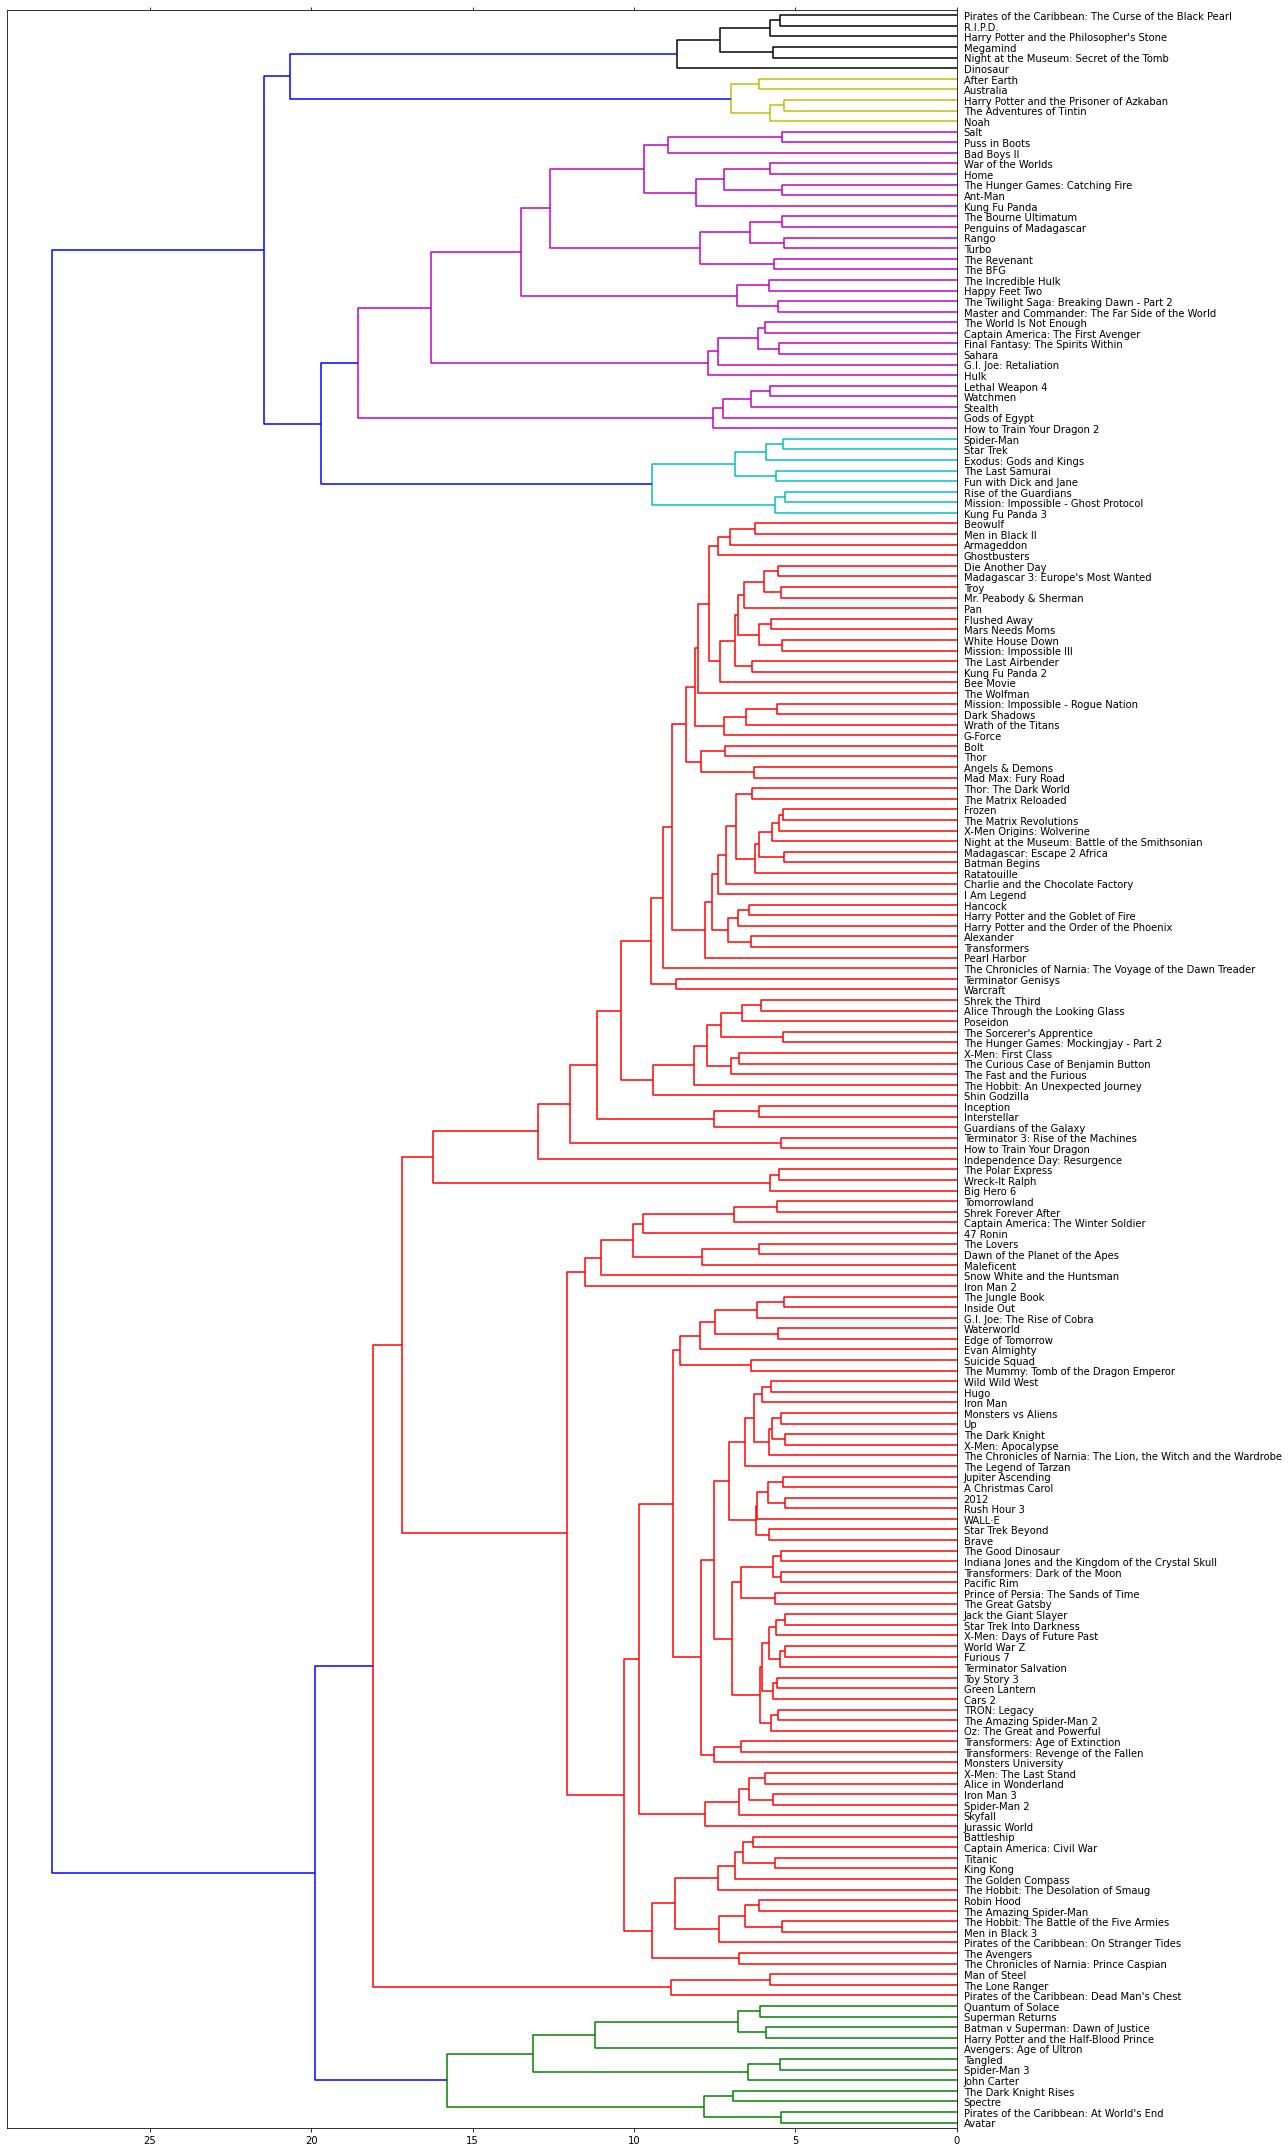

In [19]:
ward_linkage_matrix = ward_cosine_hierarchical_clustering(doc_vecs_ft)
plot_hierarchical_clusters(ward_linkage_matrix,
                           p=200,
                           movie_data=df,
                           figure_size=(18, 30))

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


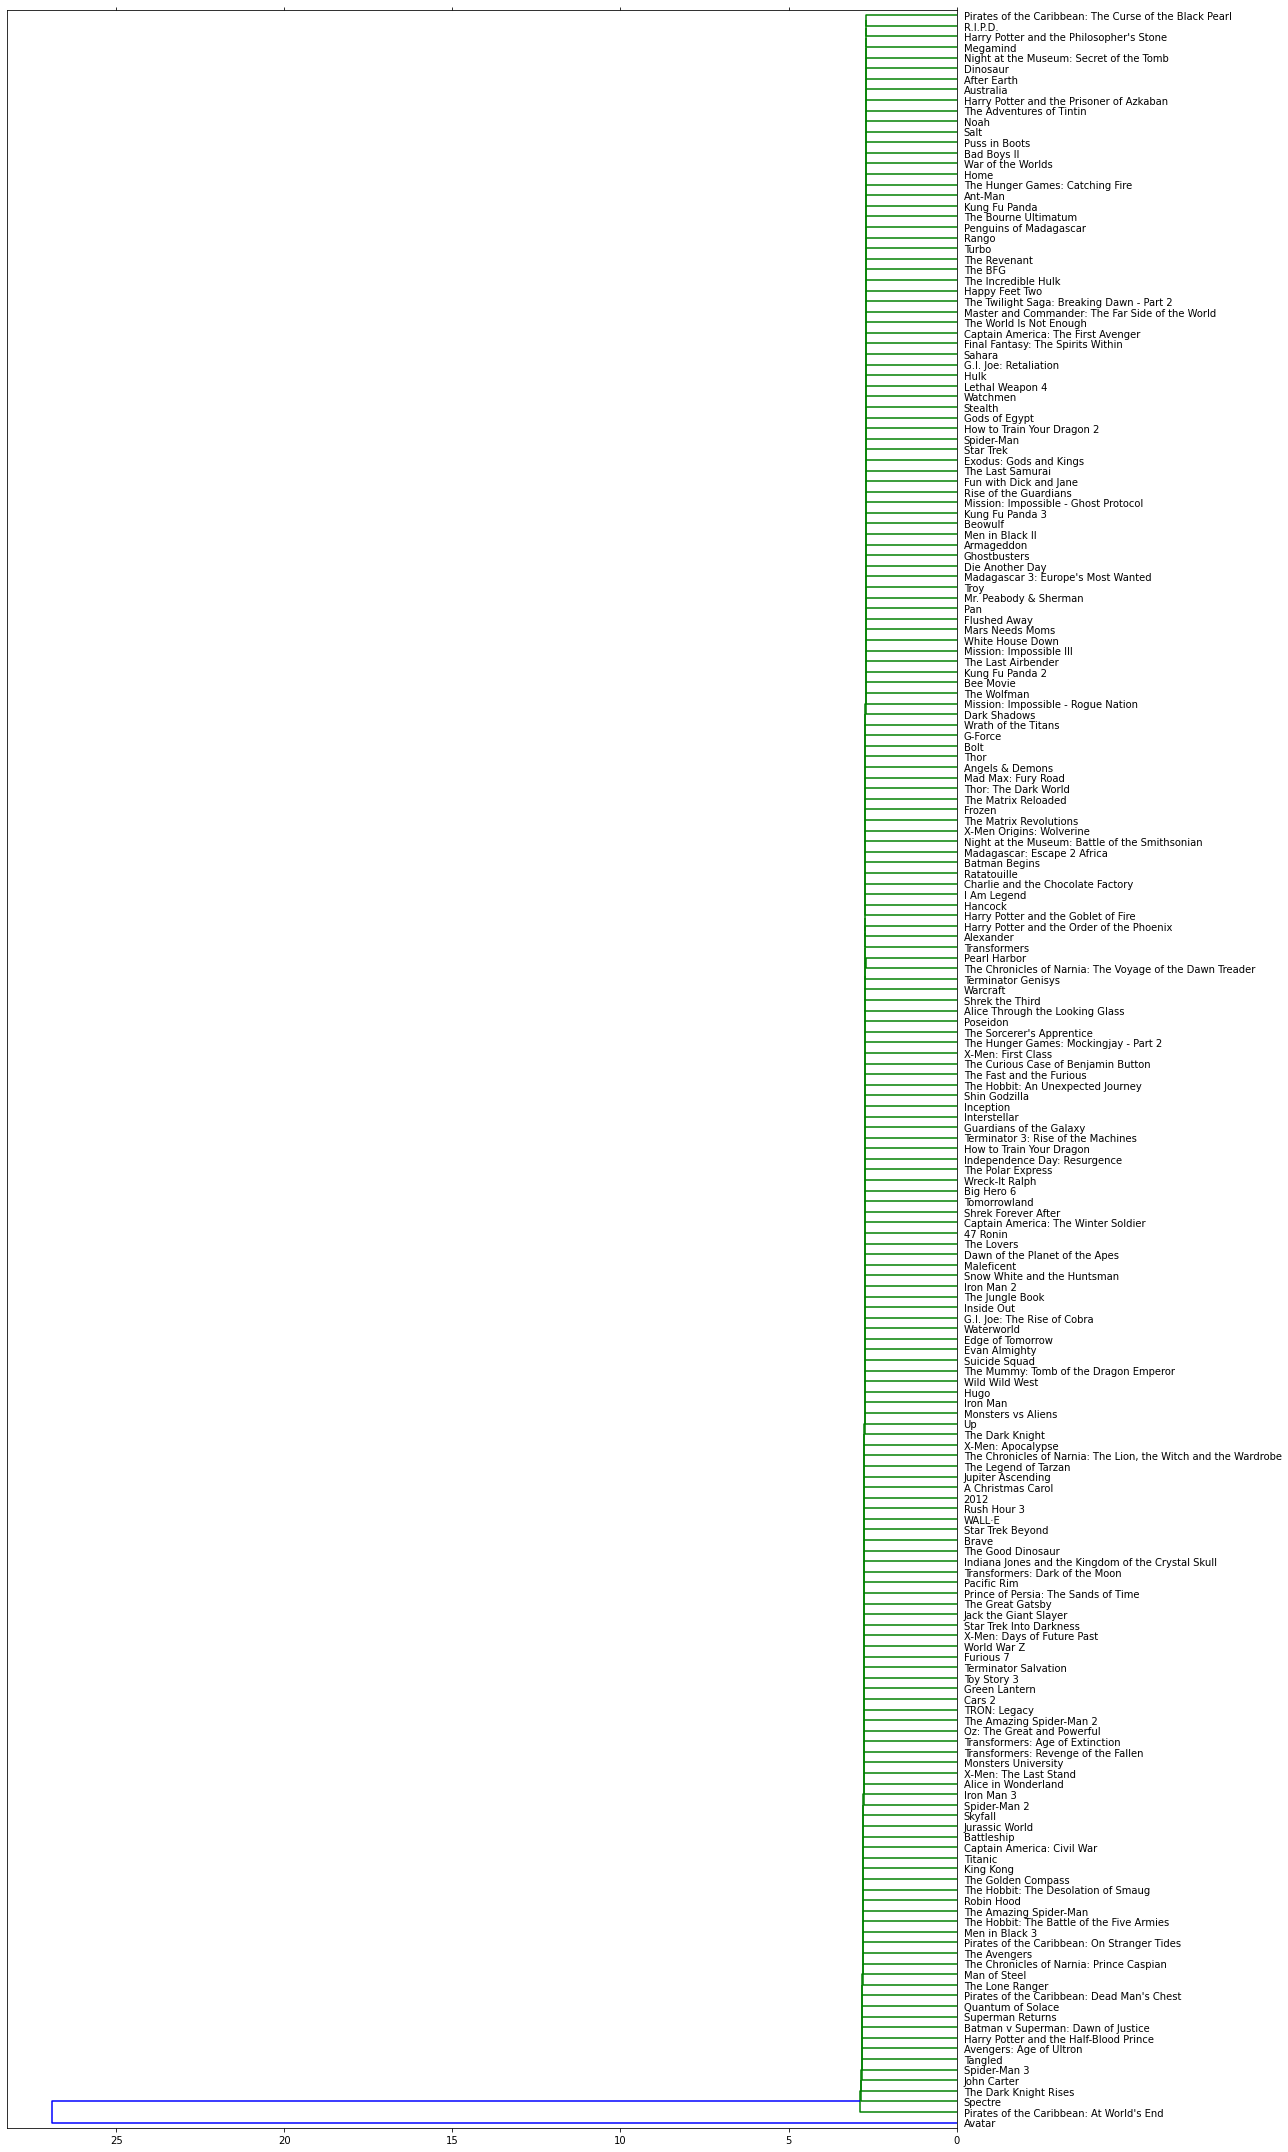

In [20]:
single_linkage_matrix = single_euclidean_hierarchical_clustering(doc_vecs_ft)
plot_hierarchical_clusters(single_linkage_matrix,
                           p=200,
                           movie_data=df,
                           figure_size=(18, 30))

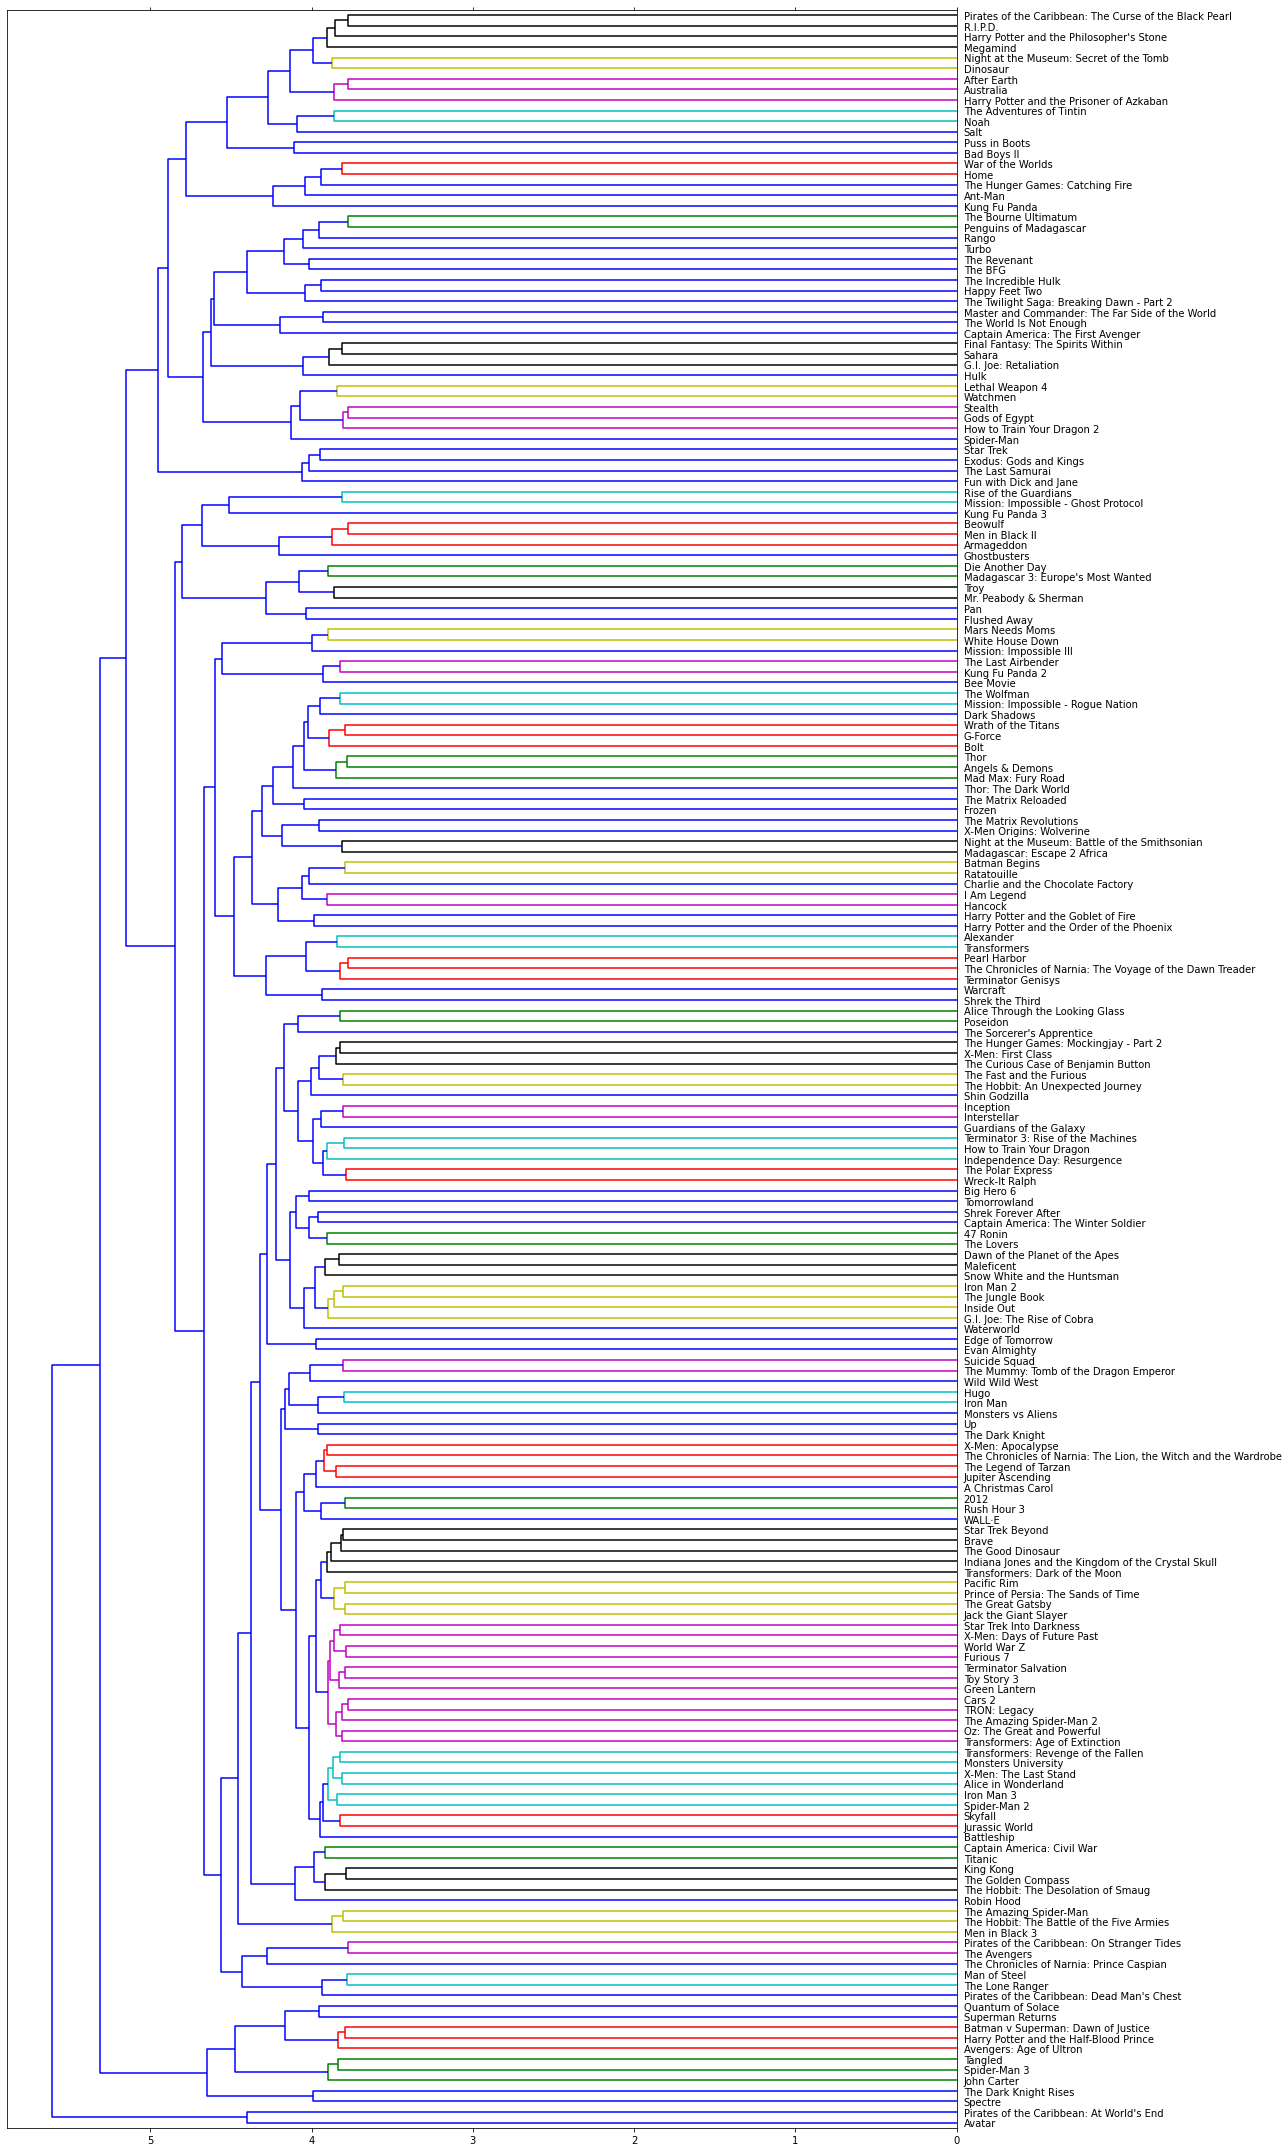

In [21]:
complete_linkage_matrix = complete_cosine_hierarchical_clustering(doc_vecs_ft)
plot_hierarchical_clusters(complete_linkage_matrix,
                           p=200,
                           movie_data=df,
                           figure_size=(18, 30))

TODO: Please describe the difference of plots of the three cluster methods and briefly explain the reason of the difference.

single的方法，在clustering的時候，會有一個cluster把所有的點都合併進去的情況。

ward跟complete不會像single一樣產生大的群會變更大，而是各個點齊頭並行。

其中ward相比single和conplete，較不會被ouotlier所影響。